In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load Data

In [2]:
data_original = pd.read_csv("./data.csv", parse_dates=['Data'])
data_raw = data_original.copy()

data_raw.columns = data_raw.columns.str.replace('Data', 'Date')
data_raw.set_index('Date', inplace=True)
data_raw.sort_index(inplace=True)

# EDA

In [3]:
data_raw.describe().T

count         mean          std        min         25%       50%  \
Y          1111.0     0.213321     0.409837    0.00000     0.00000     0.000   
XAU BGNL   1111.0   987.463744   494.623740  256.68000   433.74000  1137.800   
ECSURPUS   1111.0     0.036153     0.349453   -0.97400    -0.19100     0.035   
BDIY       1111.0  2259.860486  2017.811888  291.00000   990.00000  1518.000   
CRY        1111.0   245.247670    68.278066  106.29300   184.70555   234.560   
DXY        1111.0    90.934982    11.379095   71.32900    81.24050    89.716   
JPY        1111.0   106.605734    12.840754   75.94000   101.56500   108.720   
GBP        1111.0     1.569661     0.212344    1.17200     1.41800     1.562   
Cl1        1111.0    60.708101    25.900813   10.01000    39.62500    57.400   
VIX        1111.0    19.992169     8.642157    9.43000    13.64000    17.980   
USGG30YR   1111.0     3.908361     1.178584    1.16300     2.96000     4.100   
GT10       1111.0     3.266748     1.332464    0.50800     2.19550     3.115   
USGG2YR    1111.0     1.990379     1.710305    0.10730     0.57600     1.522   
USGG3M     1111.0     1.575180     1.802895   -0.03800     0.09000     0.958   
US0001M    1111.0     1.836137     1.909024    0.10575     0.24100     1.214   
GTDEM30Y   1111.0     3.039282     1.779526   -0.47100     1.28800     3.572   
GTDEM10Y   1111.0     2.448365     1.851558   -0.79400     0.53900     2.994   
GTDEM2Y    1111.0     1.431110     1.876061   -0.96800    -0.38250     1.057   
EONIA      1111.0     1.363676     1.721894   -0.49800    -0.22950     0.437   
GTITL30YR  1111.0     4.426725     1.274729    1.38600     3.39500     4.839   
GTITL10YR  1111.0     3.680791     1.465289    0.51200     2.32950     4.098   
GTITL2YR   1111.0     2.104911     1.700726   -0.45800     0.40350     2.214   
GTJPY30YR  1111.0     1.724494     0.720026    0.05600     1.05500     1.944   
GTJPY10YR  1111.0     0.904126     0.643985   -0.29100     0.25350     1.038   
GTJPY2YR   1111.0     0.150180     0.297519   -0.35100    -0.03100     0.097   
GTGBP30Y   1111.0     3.450157     1.263211    0.54700     2.33600     4.112   
GTGBP20Y   1111.0     3.445772     1.366181    0.48920     2.18500     4.114   
GTGBP2Y    1111.0     2.299772     2.128524   -0.16330     0.46600     0.936   
LUMSTRUU   1111.0  1637.293510   417.229338  869.33000  1251.13000  1723.800   
LMBITR     1111.0   883.615477   241.507115  472.72300   683.89650   855.517   
LUACTRUU   1111.0  2077.306949   690.731794  986.94000  1509.73000  2045.550   
LF98TRUU   1111.0  1231.258119   553.121000  491.08000   743.53500  1145.150   
LG30TRUU   1111.0   804.720667   370.251989  294.36700   479.38850   765.248   
LP01TREU   1111.0   232.109985   109.917628   80.79700   131.02500   213.205   
EMUSTRUU   1111.0   704.379545   309.951757  230.52700   434.66100   714.807   
LF94TRUU   1111.0   259.052717    75.934451  121.33100   205.31550   264.770   
MXUS       1111.0  1606.997102   698.481956  663.69000  1103.92500  1324.430   
MXEU       1111.0   107.877138    20.795973   56.30000    90.60500   111.320   
MXJP       1111.0   784.846292   200.076443  431.71000   601.61500   786.830   
MXBR       1111.0  1903.216436   986.468254  280.50000  1042.64500  1860.960   
MXRU       1111.0   648.681377   299.096020  151.25000   463.19500   612.930   
MXIN       1111.0   693.156616   405.527014  112.60000   278.38500   691.530   
MXCN       1111.0    53.933159    24.738356   13.46000    28.56500    58.740   

                 75%         max  
Y             0.0000      1.0000  
XAU BGNL   1324.8250   2006.9100  
ECSURPUS      0.2605      0.9910  
BDIY       2685.5000  11793.0000  
CRY         301.5395    467.5700  
DXY          97.4040    119.8200  
JPY         116.2200    134.6300  
GBP           1.6775      2.0850  
Cl1          79.6400    140.9700  
VIX          23.6250     75.9100  
USGG30YR      4.8445      6.7470  
GT10          4.3450      6.7480  
USGG2YR       2.9275      6.8720  
U

Anomaly rate: 0.21332133213321333


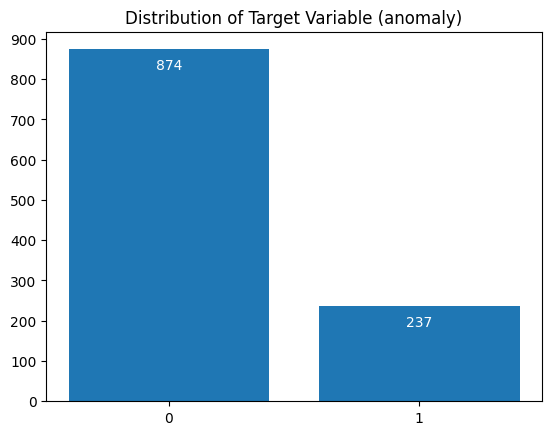

In [4]:
# Target Variable
plt.bar(np.arange(0,2), data_raw.Y.value_counts())
plt.xticks([0,1]);
plt.yticks(np.arange(0, 1000, 100))

# Add labels on top of the bars
for i, v in enumerate(data_raw.Y.value_counts()):
    plt.text(i, v - 50, str(v), ha='center', color='white')

plt.title("Distribution of Target Variable (anomaly)")

counts = data_raw.Y.value_counts()
print("Anomaly rate:", counts[1]/(counts[0]+counts[1]))
plt.show()

## Ind Var Distribution (line plot)

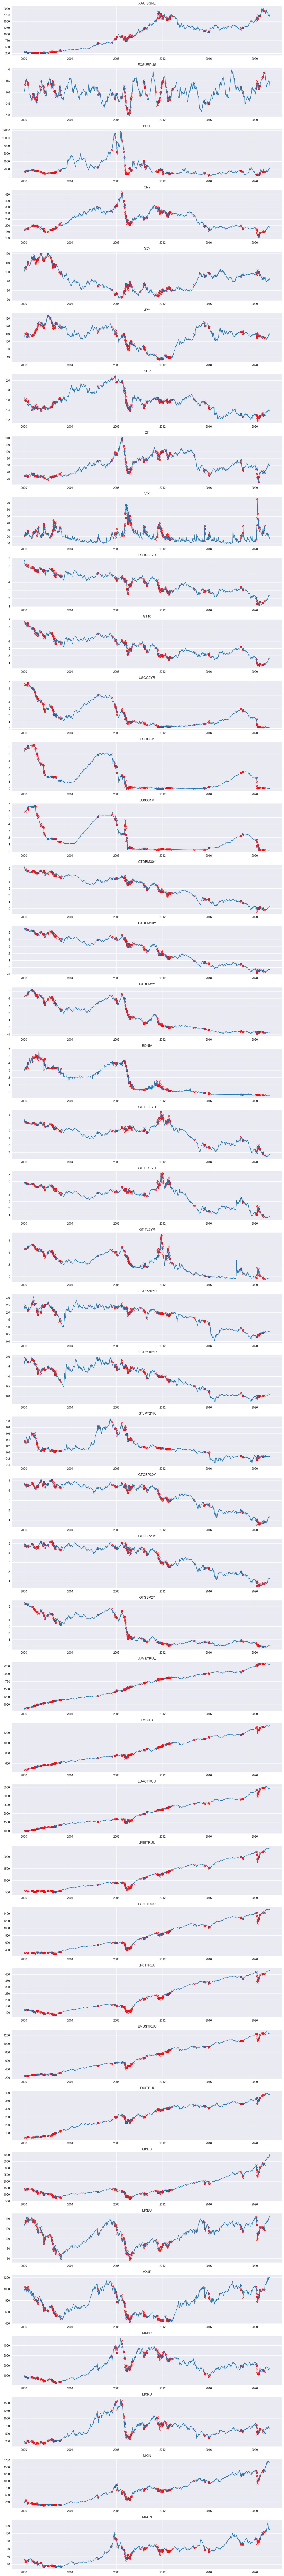

In [5]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = data_raw.iloc[:, 1:].select_dtypes(include=["int64", "float64"]).columns

def plot_vertical_lines(plt, date_str):
    date = pd.to_datetime(date_str)
    plt.axvline(x=date, color='red', linestyle='--')
    pass;

# Plot time series for each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3)) # (width, height)
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx) # (nrows, ncols, index)
    plt.plot(data_raw.index, data_raw[feature]) # plot values in the y axis with 'Date' as x-axis labels

    # plot_vertical_lines(plt, "2008-01-01")
    # plot_vertical_lines(plt, "2020-01-01")

    raw_data_anom = data_raw[data_raw["Y"]==1]
    plt.scatter(raw_data_anom.index, raw_data_anom[feature], color='red', marker='x')


    plt.title(feature)

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Ind Var Distribution (box plot)

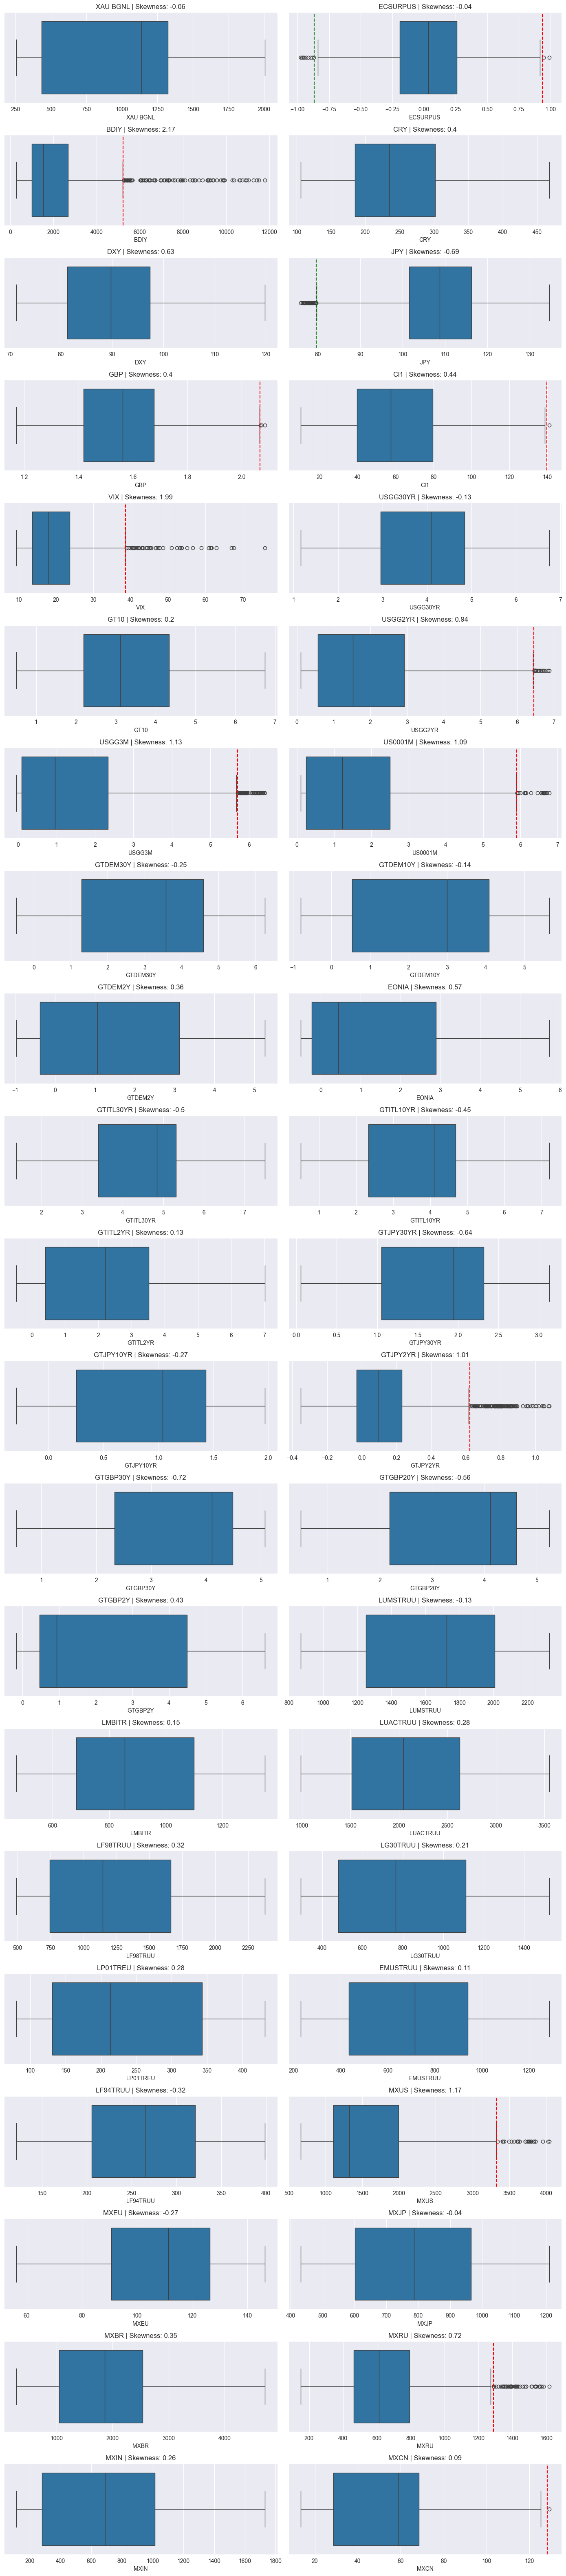

In [6]:
# Identify numerical columns
numerical_columns = data_raw.iloc[:, 1:].select_dtypes(include=["int64", "float64"]).columns

def plot_vertical_lines(plt, x_axis, color='red'):
    plt.axvline(x=x_axis, color=color, linestyle='--')
    pass;

# Plot boxplot for each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.boxplot(x=data_raw[feature])
    plt.title(f"{feature} | Skewness: {round(data_raw[feature].skew(), 2)}")
    interq = data_raw[feature].quantile(0.75) - data_raw[feature].quantile(0.25)
    thresh = (data_raw[feature].quantile(0.25) - 1.5 * interq, data_raw[feature].quantile(0.75) + 1.5 * interq)
    if(data_raw[feature].min() < thresh[0]):
      plot_vertical_lines(plt, thresh[0], 'green')
    if(data_raw[feature].max() > thresh[1]):
      # print(feature, thresh, data_raw[feature].max())
      plot_vertical_lines(plt, thresh[1])

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Ind Var Distribution (violin plot)

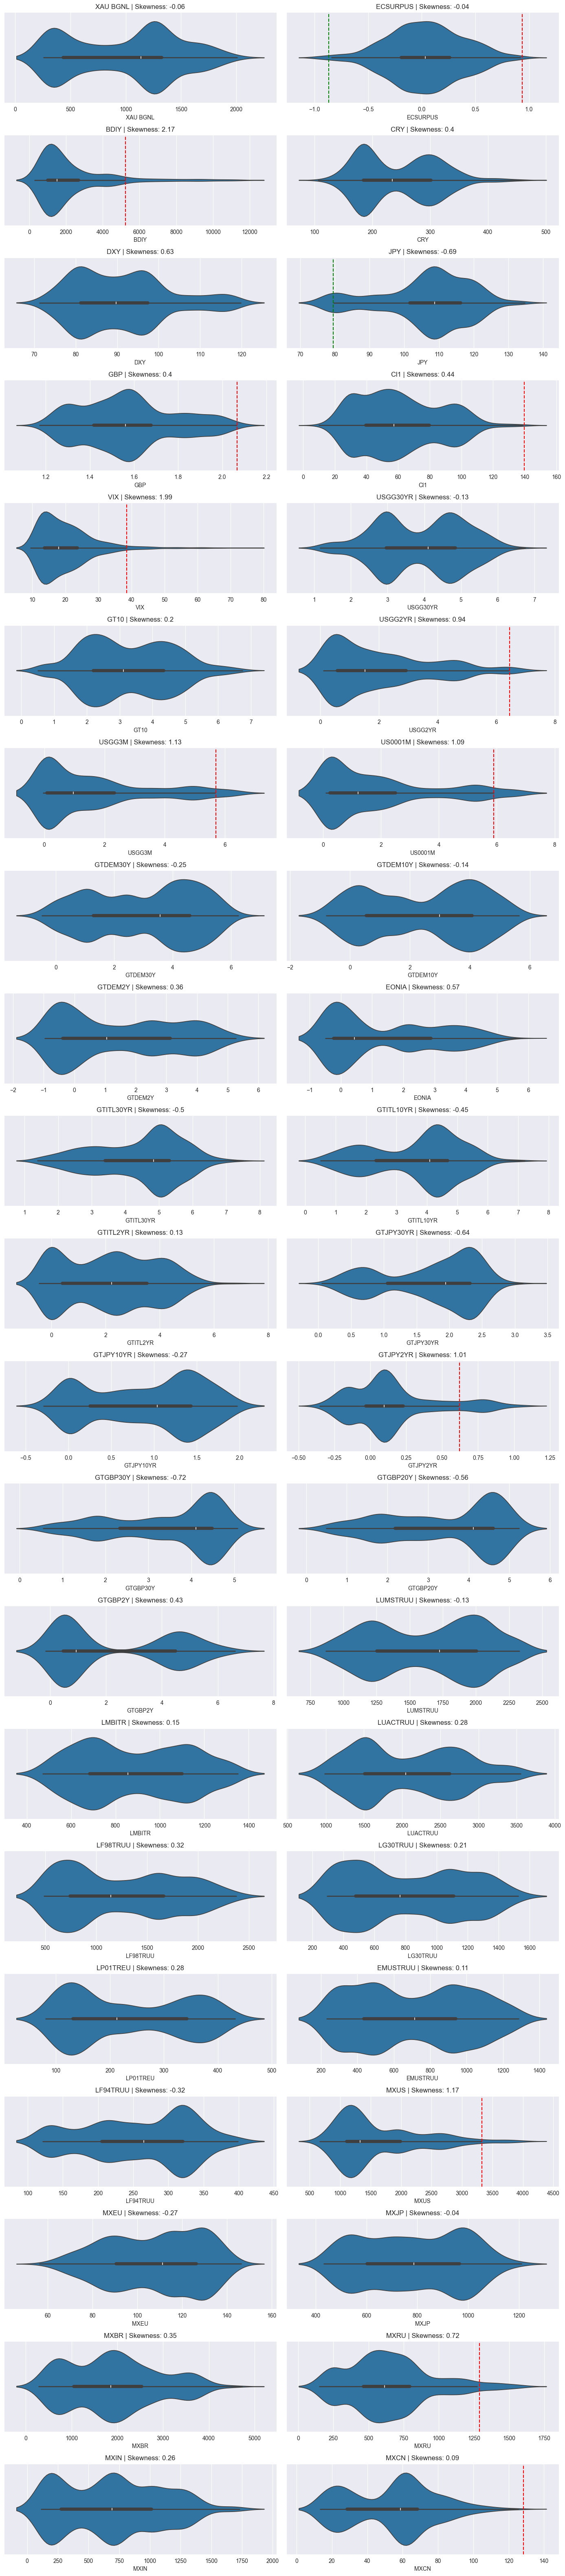

In [7]:
# Identify numerical columns
numerical_columns = data_raw.iloc[:, 1:].select_dtypes(include=["int64", "float64"]).columns

def plot_vertical_lines(plt, x_axis, color='red'):
    plt.axvline(x=x_axis, color=color, linestyle='--')
    pass;

# Plot boxplot for each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.violinplot(x=data_raw[feature])
    plt.title(f"{feature} | Skewness: {round(data_raw[feature].skew(), 2)}")
    interq = data_raw[feature].quantile(0.75) - data_raw[feature].quantile(0.25)
    thresh = (data_raw[feature].quantile(0.25) - 1.5 * interq, data_raw[feature].quantile(0.75) + 1.5 * interq)
    if(data_raw[feature].min() < thresh[0]):
      plot_vertical_lines(plt, thresh[0], 'green')
    if(data_raw[feature].max() > thresh[1]):
    #   print(feature, thresh, data_raw[feature].max())
      plot_vertical_lines(plt, thresh[1])

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## Correlation

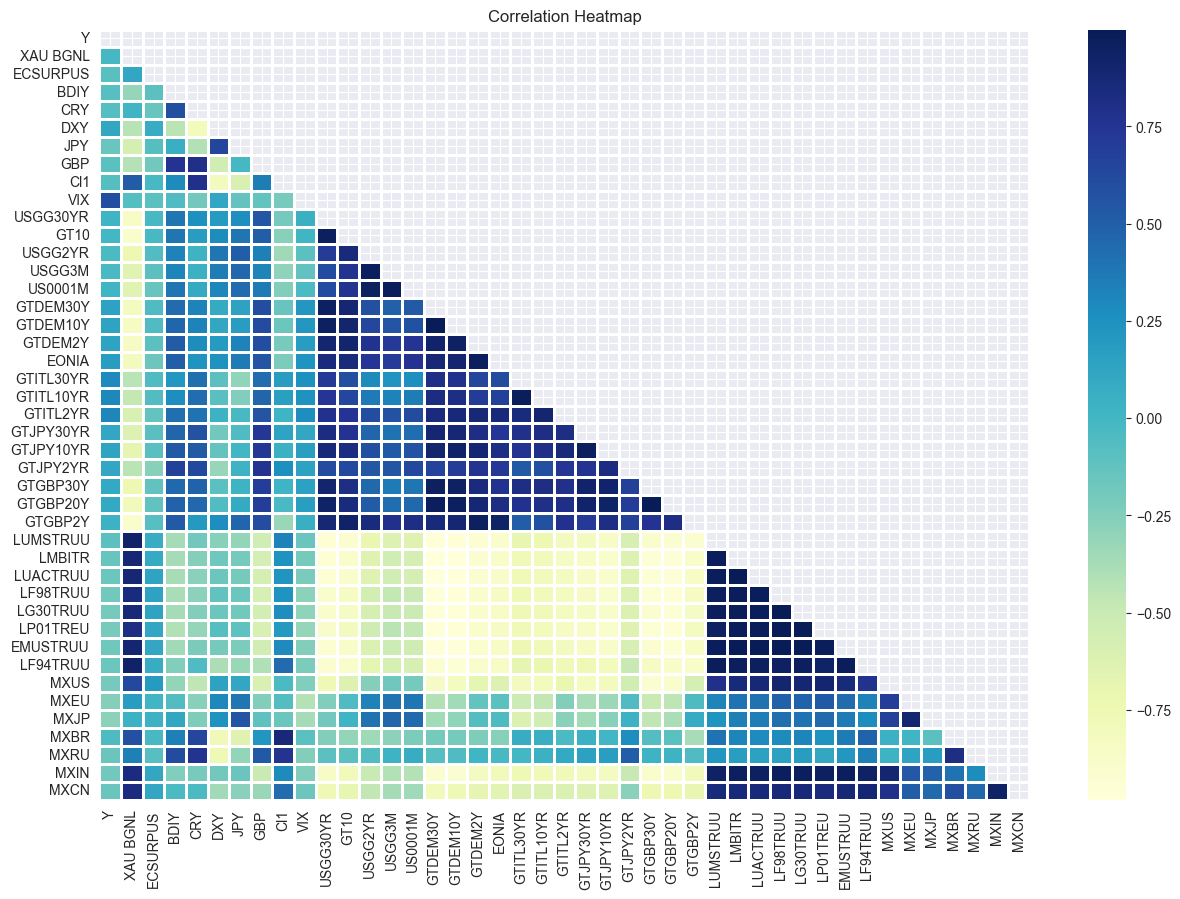

In [8]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
mask = np.triu(np.ones_like(data_raw.corr(), dtype=bool))
sns.heatmap(data_raw.corr(), annot=False, cmap='YlGnBu', linewidths=2, mask=mask)

plt.title('Correlation Heatmap')
plt.show()

In [12]:
# top 5 highest and lowest correlation with Y
top5 = data_raw.corr().iloc[:,0].sort_values(ascending=False)[1:6].index.astype("string")
bot5 = data_raw.corr().iloc[:,0].sort_values(ascending=True)[0:5].index.astype("string")
print(f'top5: {top5}', f'\nbottom5: {bot5}')

top5: Index(['VIX', 'GTITL2YR', 'GTITL10YR', 'GTITL30YR', 'EONIA'], dtype='string') 
bottom5: Index(['MXJP', 'MXEU', 'LP01TREU', 'LG30TRUU', 'MXUS'], dtype='string')


# Create Models

In [15]:
# sklearn to create IsolationForst, OneClassSVM and KernelDensity
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KernelDensity
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score

def use_convention(predictions):
  # use convention 1: anomaly and 0: normal
  convention = [1 if pred == -1 else 0 for pred in predictions]
  return convention

eval_metrics = {}

## Util

In [16]:
def get_metrics(y_test, y_pred):
  from sklearn import metrics
  acc = metrics.accuracy_score(y_test, y_pred)
  prec = metrics.precision_score(y_test, y_pred)
  rec = metrics.recall_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred)
  kappa = metrics.cohen_kappa_score(y_test, y_pred)

  # # Calculate area under curve (AUC)
  # y_pred_proba = pipeline.predict_proba(X_test)[::,1]
  # fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
  # auc = metrics.roc_auc_score(y_test, y_pred_proba)

  return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa}

def print_metrics(model):
  print(f'{model} metrics:')
  for metric, value in eval_metrics[model].items():
    print(f"{metric}: {value}")
  pass

## Data Prep

In [40]:
# dropna
data = data_raw.dropna()

# standardize data
def standardize_data(data):
  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(data)
  data_transformed_df = pd.DataFrame(data_scaled, index=data.index, columns=data.columns)
  return data_transformed_df

# features + target
target_name = 'Y'
y = data[target_name].copy()
X = standardize_data(data).drop(columns=[target_name]).copy()

## Comparing Models

### Baseline

In [41]:
# select features
feature_names = ['VIX', 'GTITL10YR', 'EONIA', 'MXUS', 'LP01TREU', 'LG30TRUU']

def check_has_feature(string, feature_names):
    return any(substring in string for substring in feature_names)

select_features = X.loc[:, X.columns.map(lambda feat: check_has_feature(feat, feature_names))]
print(select_features.shape)

(1111, 6)


In [42]:
# Isolation Forest
contamination = data_raw.Y.value_counts()[1] / (data_raw.Y.value_counts()[0] + data_raw.Y.value_counts()[1])
IF = IsolationForest(n_estimators=200, contamination=contamination, random_state=14)
IF.fit(select_features)
IF_pred = IF.predict(select_features)
eval_metrics['IF'] = get_metrics(y, use_convention(IF_pred))

print_metrics('IF')

IF metrics:
acc: 0.8181818181818182
prec: 0.5738396624472574
rec: 0.5738396624472574
f1: 0.5738396624472574
kappa: 0.4582790217149919


**Notes**

* We're intreresred in recall. If a recession does happen, we want to know.

### Other unsupervised models

In [43]:
from sklearn.cluster import DBSCAN

# DBSCAN
# eps : float, default=0.5
  # The maximum distance between two samples for one to be considered
  # as in the neighborhood of the other. This is not a maximum bound
  # on the distances of points within a cluster.
# min_samples : int, default=5
  # The number of samples (or total weight) in a neighborhood for a point to
  # be considered as a core point. This includes the point itself.
DB = DBSCAN(eps=3, min_samples=1)
predictions = DB.fit_predict(select_features)
# Anomalies are points predicted as "-1"
# Use convention (1 = anomaly, 0)
binary_predictions = np.where(predictions == -1, 1, 0)
dbscan = pd.DataFrame({'pred': binary_predictions, 'target':y})
eval_metrics['DB'] = get_metrics(y, use_convention(binary_predictions));

print(f"For DBSCAN ({roc_auc_score(dbscan['target'], dbscan['pred'])}):\n{
  classification_report(dbscan['pred'], dbscan['target'], zero_division=0)
  }");

For DBSCAN (0.5):
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      1111
           1       0.00      0.00      0.00         0

    accuracy                           0.79      1111
   macro avg       0.50      0.39      0.44      1111
weighted avg       1.00      0.79      0.88      1111



/Users/brauliopf/Documents/Dev/headstarter/projects/10-anomaly-detection/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
# OneClassSVM Forest
impurity = data_raw.Y.value_counts()[0] / (data_raw.Y.value_counts()[0] + data_raw.Y.value_counts()[1])
OC = OneClassSVM(nu=impurity)
OC.fit(select_features)
OC_pred = OC.predict(select_features)
eval_metrics['OC'] = get_metrics(y, use_convention(OC_pred));

print(f"For OneClassSVM ({roc_auc_score(y, use_convention(OC_pred))}):\n{
  classification_report(use_convention(OC_pred), y, zero_division=0)
  }")

For OneClassSVM (0.5980385057304792):
              precision    recall  f1-score   support

           0       0.26      0.94      0.40       237
           1       0.94      0.26      0.40       874

    accuracy                           0.40      1111
   macro avg       0.60      0.60      0.40      1111
weighted avg       0.79      0.40      0.40      1111



In [45]:
# Kernel Density
KD = KernelDensity()
KD.fit(select_features)
scores = KD.score_samples(select_features)
threshold = np.quantile(scores, impurity)
KD_pred = [-1 if score < threshold else 1 for score in scores]
eval_metrics['KD']=get_metrics(y, use_convention(KD_pred));

print(f"For Kernel Density ({roc_auc_score(y, use_convention(KD_pred))}):\n{classification_report(use_convention(KD_pred), y, zero_division=0)}")

For Kernel Density (0.606083866794118):
              precision    recall  f1-score   support

           0       0.26      0.95      0.41       237
           1       0.95      0.26      0.41       874

    accuracy                           0.41      1111
   macro avg       0.61      0.61      0.41      1111
weighted avg       0.81      0.41      0.41      1111



### Feature Engineering

In [46]:
def create_moving_features(data, window_size=10):
    ## calculate moving average for each feature
    moving_df = pd.concat([pd.DataFrame(index=data.index),
                           pd.concat([data[feat].rolling(window=window_size).mean().rename(f'{feat}_ma{window_size}') for feat in data], axis=1)],
                           axis=1)
    moving_df = pd.concat([moving_df,
                           pd.concat([(data[feat] - moving_df[f'{feat}_ma{window_size}']).rename(f'{feat}_diff_ma{window_size}') for feat in data], axis=1)],
                           axis=1)
    moving_df = pd.concat([moving_df,
                           pd.concat([data[feat].rolling(window=window_size).std().rename(f'{feat}_mstd{window_size}') for feat in data], axis=1)],
                           axis=1)
    return moving_df

data_moving_features = create_moving_features(data_raw, 5)
data_fe = pd.concat([data_raw, data_moving_features], axis=1)
print("LOG OF FE:")
print("Before:", data_raw.shape)
print("After:", data_fe.shape, f'diff={data_raw.shape[1]} * {(data_fe.shape[1] - data_raw.shape[1])/data_raw.shape[1]}')

LOG OF FE:
Before: (1111, 43)
After: (1111, 172) diff=43 * 3.0


In [47]:
# dropna
data = data_fe.dropna()

# standardize data
def standardize_data(data):
  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(data)
  data_transformed_df = pd.DataFrame(data_scaled, index=data.index, columns=data.columns)
  return data_transformed_df

# features + target
target_name = 'Y'
y = data[target_name].copy()
X = standardize_data(data).drop(columns=[target_name]).copy()

In [48]:
target_counts = y.value_counts()

# impurity
impurity = target_counts[1]/(target_counts[0] + target_counts[1])
print("impurity", impurity)

impurity 0.2140921409214092


**Model**

In [49]:
# select features
feature_names = ['VIX', 'GTITL10YR', 'EONIA', 'MXUS', 'LP01TREU', 'LG30TRUU']

def check_has_feature(string, feature_names):
    return any(substring in string for substring in feature_names)

select_features = X.loc[:, X.columns.map(lambda feat: check_has_feature(feat, feature_names))]
print(select_features.shape)

(1107, 24)


In [50]:
# Isolation Forest
contamination = data_fe.Y.value_counts()[1] / (data_fe.Y.value_counts()[0] + data_fe.Y.value_counts()[1])
IF = IsolationForest(n_estimators=200, contamination=contamination, random_state=14)
IF.fit(select_features)
IF_pred = IF.predict(select_features)
eval_metrics['IF_fe'] = get_metrics(y, use_convention(IF_pred))

print_metrics('IF_fe')

IF_fe metrics:
acc: 0.7967479674796748
prec: 0.5254237288135594
rec: 0.5232067510548524
f1: 0.5243128964059197
kappa: 0.39507755976364123


## PCA

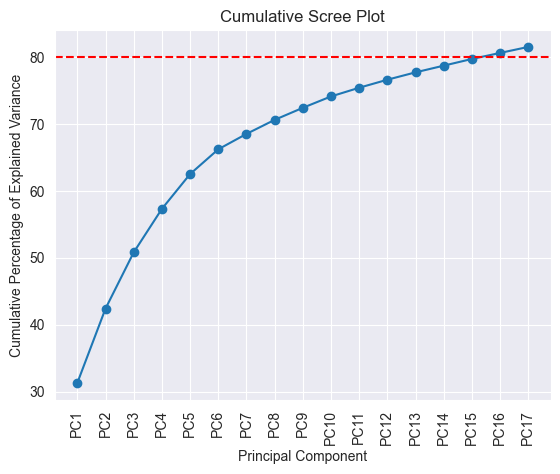

In [51]:
from sklearn.decomposition import PCA

pca = PCA() # use n_components to get a limited number of PCs
pca.fit(X)
pca_data = pca.transform(X) # project X on the PCs

# scree plot
explained_variance = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(explained_variance)+1)]

threshold = 0.8
filtered_per_var = [var for var in explained_variance if var > threshold]
filtered_labels = [label for label in labels if explained_variance[labels.index(label)] > threshold]
cumulative_per_var = np.cumsum(filtered_per_var)
plt.plot(range(1,len(filtered_per_var)+1), cumulative_per_var, marker='o')
plt.xticks(range(1,len(filtered_per_var)+1), filtered_labels, rotation=90)
plt.axhline(y=80, color='r', linestyle='--')
plt.ylabel('Cumulative Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Cumulative Scree Plot')
plt.show()

In [54]:
# Model using PCs
pca = PCA(0.8)
pca.fit(X)
pca_data = pca.transform(X)

# Isolation Forest
IF = IsolationForest(n_estimators=350, contamination=impurity)
IF.fit(pca_data)
IF_pred = IF.predict(pca_data)
eval_metrics['IF_pca'] = get_metrics(y, use_convention(IF_pred));

print(f"For Isolation Forest ({roc_auc_score(y, use_convention(IF_pred))}):\n{classification_report(use_convention(IF_pred), y)}")

For Isolation Forest (0.6590790048013968):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       870
           1       0.46      0.46      0.46       237

    accuracy                           0.77      1107
   macro avg       0.66      0.66      0.66      1107
weighted avg       0.77      0.77      0.77      1107



## Supervised

In [67]:
X = standardize_data(data_raw).drop(columns=['Y']).copy()
# features + target
target_name = 'Y'
y = data[target_name].copy()
X = standardize_data(data).drop(columns=[target_name]).copy()

# Use only selected features

X = X.loc[:, X.columns.map(lambda feat: check_has_feature(feat, feature_names))]
print(X.shape, y.shape, '--Main Proxies:', feature_names)

(1107, 24) (1107,) --Main Proxies: ['VIX', 'GTITL10YR', 'EONIA', 'MXUS', 'LP01TREU', 'LG30TRUU']


### Logistic Regression

In [68]:
# split data
# reserve 2/3 for training and 1/3 for testing
split_index = int(.67 *len(data))
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

from sklearn.linear_model import LogisticRegression

# Create model
lr = LogisticRegression()

# address class imbalance --oversampling the train dataset using SMOTE
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

# train model
lr.fit(X_train_sm, y_train_sm)

# predict
y_pred = lr.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       357
           1       0.20      0.89      0.32         9

    accuracy                           0.91       366
   macro avg       0.60      0.90      0.64       366
weighted avg       0.98      0.91      0.93       366



### Random Forest

In [71]:
# Create model
from sklearn.ensemble import RandomForestClassifier

# split data
# reserve 2/3 for training and 1/3 for testing
split_index = int(.667 *len(data))
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

# address class imbalance --oversampling the train dataset using SMOTE
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

# train model
rf = RandomForestClassifier(random_state=14)
rf.fit(X_train, y_train)

# evaluate
y_pred = rf.predict(X_test)
print(classification_report(y_pred, y_test, zero_division=0))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       346
           1       0.46      0.83      0.59        23

    accuracy                           0.93       369
   macro avg       0.73      0.88      0.78       369
weighted avg       0.96      0.93      0.94       369



# Sandbox

In [166]:
# loc with a single row
print(sum(data.loc['2000-08-01'] == data.iloc[0]))
# loc with a single column
print(sum(data.loc[:,'bdiy'] == data['bdiy']))

172
1082


In [168]:
# loc with multiple columns
data.loc[:,['bdiy', 'vix']] == data[['bdiy', 'vix']]

# if using a boolean array, iloc and loc are similar
data.loc[:, np.array([True] + [False] * (data.shape[1] - 1)) ] == data.iloc[:, np.array([True] + [False] * (data.shape[1] - 1)) ]

y
Date            
2000-08-01  True
2000-08-08  True
2000-08-15  True
2000-08-22  True
2000-08-29  True
...          ...
2021-03-23  True
2021-03-30  True
2021-04-06  True
2021-04-13  True
2021-04-20  True

[1082 rows x 1 columns]

## DBSCAN

### Load dataset

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

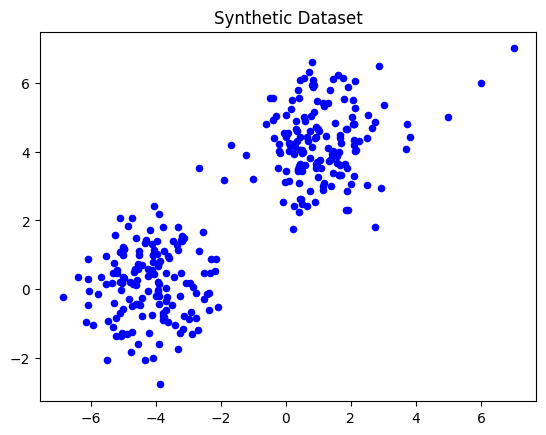

In [2]:
n_samples=300
# Generate isotropic Gaussian blobs for clustering.
X, y = make_blobs(n_samples=n_samples, centers=2, random_state=3, cluster_std=1.0)
anomalies = np.array([[5, 5], [6, 6], [7, 7]])

# Combine the normal data and anomalies
X = np.vstack([X, anomalies])

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=20) # X[: ,i] -> entire i-th column
plt.title("Synthetic Dataset")
plt.show()

### Apply DBSCAN

In [3]:
# Apply DBSCAN for anomaly detection with increased epsilon
# eps : float, default=0.5
  # The maximum distance between two samples for one to be considered
  # as in the neighborhood of the other. This is not a maximum bound
  # on the distances of points within a cluster.
# min_samples : int, default=5
  # The number of samples (or total weight) in a neighborhood for a point to
  # be considered as a core point. This includes the point itself.
dbscan = DBSCAN(eps=1.5, min_samples=40)
labels = dbscan.fit_predict(X)

# Anomalies are considered as points with label -1
anomalies = X[labels == -1]

Notes:

**model finds the likelihood of being an anomally**
- higher values of eps make model less strict -> finds less anomallies
- higher values of min_samples make the model more strict -> find more anomallies

Conclusions:

* Values of eps and  min_samples are dependant on the nature of data and the size of the dataset

### Visualize

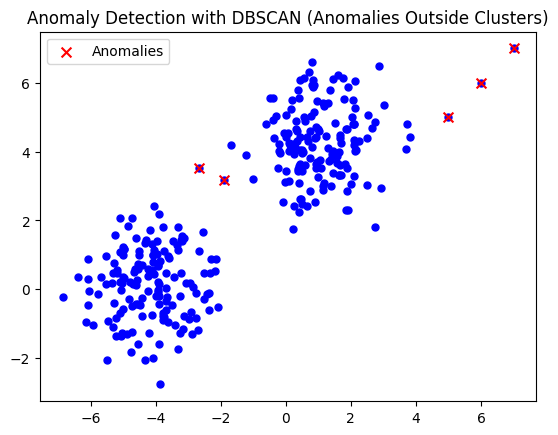

In [4]:
# Visualize the anomalies
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=25)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='x', s=50, label='Anomalies')
plt.title("Anomaly Detection with DBSCAN (Anomalies Outside Clusters)")
plt.legend()
plt.show()